In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


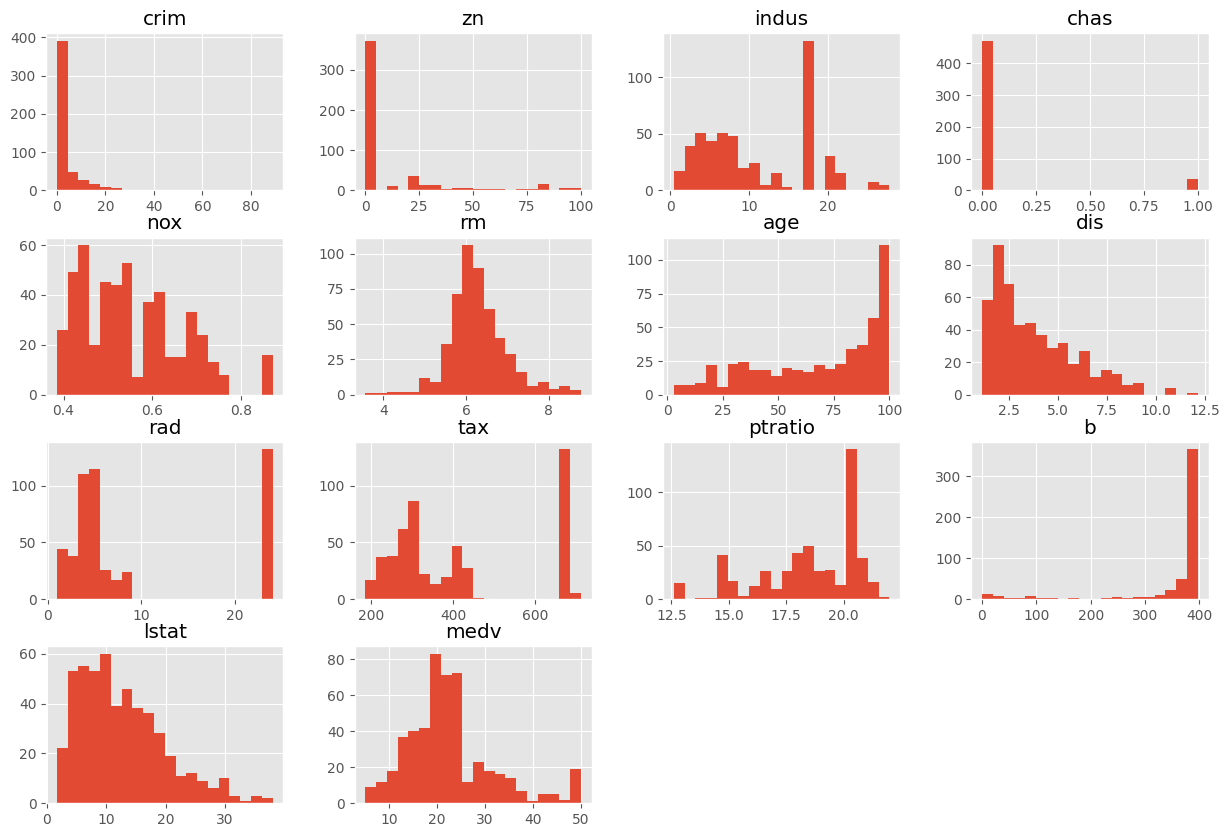

In [4]:
fig,ax=plt.subplots(figsize=(15,10))
df.hist(bins=20,ax=ax)
plt.show()

In [5]:
df.corr()['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='medv')
y=df['medv']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,1000,2000],
            'learning_rate':[0.01,0.1,0.15],
            'max_depth':[None,1,3,5,7,9]}

grid_search_cv=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,verbose=10,scoring='r2')
grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(best_model)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 1/5; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=-0.127 total time=   0.0s
[CV 2/5; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 2/5; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=0.016 total time=   0.0s
[CV 3/5; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 3/5; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=-0.138 total time=   0.0s
[CV 4/5; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 4/5; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=-0.206 total time=   0.0s
[CV 5/5; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 5/5; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=-0.317 total time=   0.0s
[CV 

[CV 5/5; 9/54] END learning_rate=0.01, max_depth=3, n_estimators=2000;, score=0.859 total time=   2.8s
[CV 1/5; 10/54] START learning_rate=0.01, max_depth=5, n_estimators=100.........
[CV 1/5; 10/54] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=-0.127 total time=   0.0s
[CV 2/5; 10/54] START learning_rate=0.01, max_depth=5, n_estimators=100.........
[CV 2/5; 10/54] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.019 total time=   0.1s
[CV 3/5; 10/54] START learning_rate=0.01, max_depth=5, n_estimators=100.........
[CV 3/5; 10/54] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=-0.139 total time=   0.0s
[CV 4/5; 10/54] START learning_rate=0.01, max_depth=5, n_estimators=100.........
[CV 4/5; 10/54] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=-0.199 total time=   0.0s
[CV 5/5; 10/54] START learning_rate=0.01, max_depth=5, n_estimators=100.........
[CV 5/5; 10/54] END learning_rate=0.01, max_depth=5, n_estimators=100;, score

[CV 5/5; 18/54] END learning_rate=0.01, max_depth=9, n_estimators=2000;, score=0.884 total time=   3.5s
[CV 1/5; 19/54] START learning_rate=0.1, max_depth=None, n_estimators=100.......
[CV 1/5; 19/54] END learning_rate=0.1, max_depth=None, n_estimators=100;, score=0.900 total time=   0.0s
[CV 2/5; 19/54] START learning_rate=0.1, max_depth=None, n_estimators=100.......
[CV 2/5; 19/54] END learning_rate=0.1, max_depth=None, n_estimators=100;, score=0.873 total time=   0.0s
[CV 3/5; 19/54] START learning_rate=0.1, max_depth=None, n_estimators=100.......
[CV 3/5; 19/54] END learning_rate=0.1, max_depth=None, n_estimators=100;, score=0.873 total time=   0.0s
[CV 4/5; 19/54] START learning_rate=0.1, max_depth=None, n_estimators=100.......
[CV 4/5; 19/54] END learning_rate=0.1, max_depth=None, n_estimators=100;, score=0.834 total time=   0.0s
[CV 5/5; 19/54] START learning_rate=0.1, max_depth=None, n_estimators=100.......
[CV 5/5; 19/54] END learning_rate=0.1, max_depth=None, n_estimators=100

[CV 5/5; 27/54] END learning_rate=0.1, max_depth=3, n_estimators=2000;, score=0.840 total time=   1.4s
[CV 1/5; 28/54] START learning_rate=0.1, max_depth=5, n_estimators=100..........
[CV 1/5; 28/54] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.893 total time=   0.0s
[CV 2/5; 28/54] START learning_rate=0.1, max_depth=5, n_estimators=100..........
[CV 2/5; 28/54] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.894 total time=   0.0s
[CV 3/5; 28/54] START learning_rate=0.1, max_depth=5, n_estimators=100..........
[CV 3/5; 28/54] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.872 total time=   0.0s
[CV 4/5; 28/54] START learning_rate=0.1, max_depth=5, n_estimators=100..........
[CV 4/5; 28/54] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.836 total time=   0.0s
[CV 5/5; 28/54] START learning_rate=0.1, max_depth=5, n_estimators=100..........
[CV 5/5; 28/54] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.874 t

[CV 5/5; 36/54] END learning_rate=0.1, max_depth=9, n_estimators=2000;, score=0.881 total time=   1.1s
[CV 1/5; 37/54] START learning_rate=0.15, max_depth=None, n_estimators=100......
[CV 1/5; 37/54] END learning_rate=0.15, max_depth=None, n_estimators=100;, score=0.896 total time=   0.0s
[CV 2/5; 37/54] START learning_rate=0.15, max_depth=None, n_estimators=100......
[CV 2/5; 37/54] END learning_rate=0.15, max_depth=None, n_estimators=100;, score=0.882 total time=   0.0s
[CV 3/5; 37/54] START learning_rate=0.15, max_depth=None, n_estimators=100......
[CV 3/5; 37/54] END learning_rate=0.15, max_depth=None, n_estimators=100;, score=0.871 total time=   0.0s
[CV 4/5; 37/54] START learning_rate=0.15, max_depth=None, n_estimators=100......
[CV 4/5; 37/54] END learning_rate=0.15, max_depth=None, n_estimators=100;, score=0.829 total time=   0.0s
[CV 5/5; 37/54] START learning_rate=0.15, max_depth=None, n_estimators=100......
[CV 5/5; 37/54] END learning_rate=0.15, max_depth=None, n_estimators

[CV 5/5; 45/54] END learning_rate=0.15, max_depth=3, n_estimators=2000;, score=0.853 total time=   1.2s
[CV 1/5; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 1/5; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.875 total time=   0.0s
[CV 2/5; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 2/5; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.881 total time=   0.0s
[CV 3/5; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 3/5; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.872 total time=   0.0s
[CV 4/5; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 4/5; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 5/5; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 5/5; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=0

[CV 5/5; 54/54] END learning_rate=0.15, max_depth=9, n_estimators=2000;, score=0.883 total time=   1.0s
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2000}
0.8786629738849727


In [9]:
#best_params={'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2000}

In [10]:
from sklearn.model_selection import learning_curve

train_sizes=np.linspace(0.1,1,10)

train_sizes,train_scores,test_scores=learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='r2',
    verbose=10
)


[learning_curve] Training set sizes: [ 32  64  96 129 161 193 226 258 290 323]
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.566) total time=   1.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.731) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.781) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.776) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.6s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.818) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.830) total time=   1.7s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.1s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.827) total time=   1.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.9s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.819) total time=   1.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.9s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.841) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.0s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.899) total time=   2.1s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.587) total time=   0.9s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.836) total time=   1.1s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.833) total time=   1.3s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.872) total time=   1.4s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.868) total time=   1.6s
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

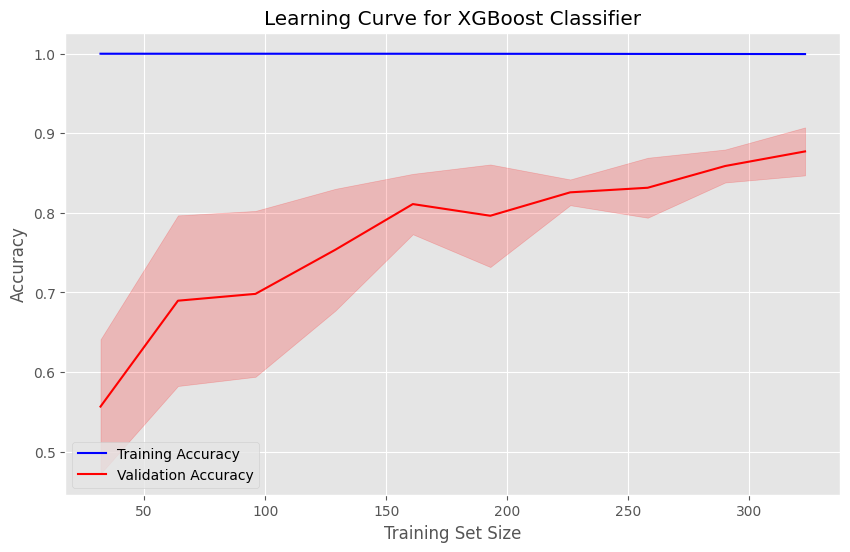

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for XGBoost Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [13]:
test_prediction=best_model.predict(X_test)
from sklearn import metrics


r2_test=metrics.r2_score(test_prediction,y_test)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)

print(r2_test,mae_test,rmse_test)

0.9226494574971774 1.6559317065220254 2.3200614414606706


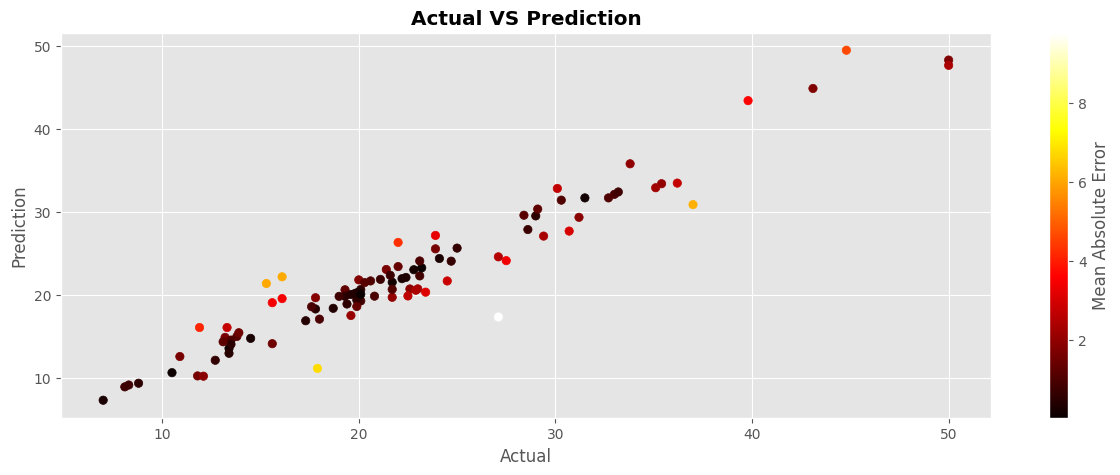

In [14]:
plt.figure(figsize=(15,5))
plt.scatter(x=y_test,y=test_prediction,c=(y_test-test_prediction).abs(),cmap='hot')
plt.title('Actual VS Prediction',fontweight='bold')
plt.colorbar().set_label('Mean Absolute Error')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

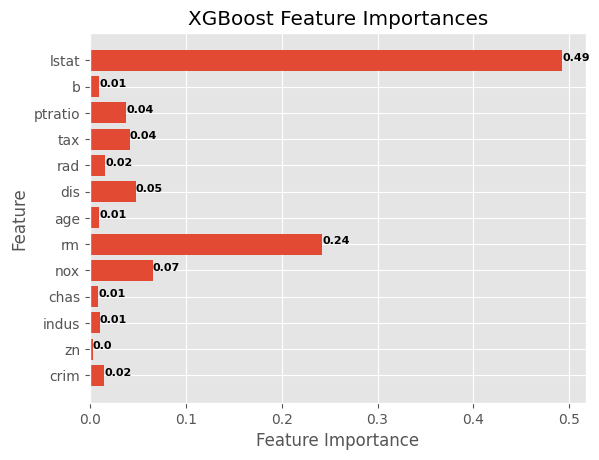

In [15]:
weights=best_model.feature_importances_
features=best_model.feature_names_in_

plt.barh(y=features, width=weights)
for i in range(len(features)):
    plt.text(weights[i],i,weights[i].round(2),fontweight='bold',size=8)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()

# Error Analysis

In [16]:
test=X_test
test['Actual']=y_test
test['Prediction']=test_prediction

test['Error']=test['Actual']-test['Prediction']

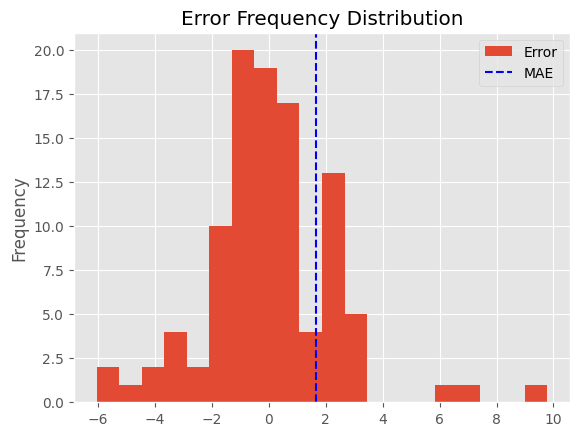

In [17]:
mae=test['Error'].abs().mean()
rmse=test['Error'].std()

test['Error'].plot.hist(bins=20)
plt.axvline(mae,ls='--',color='blue',label='MAE')
plt.title('Error Frequency Distribution')
plt.legend()
plt.show()

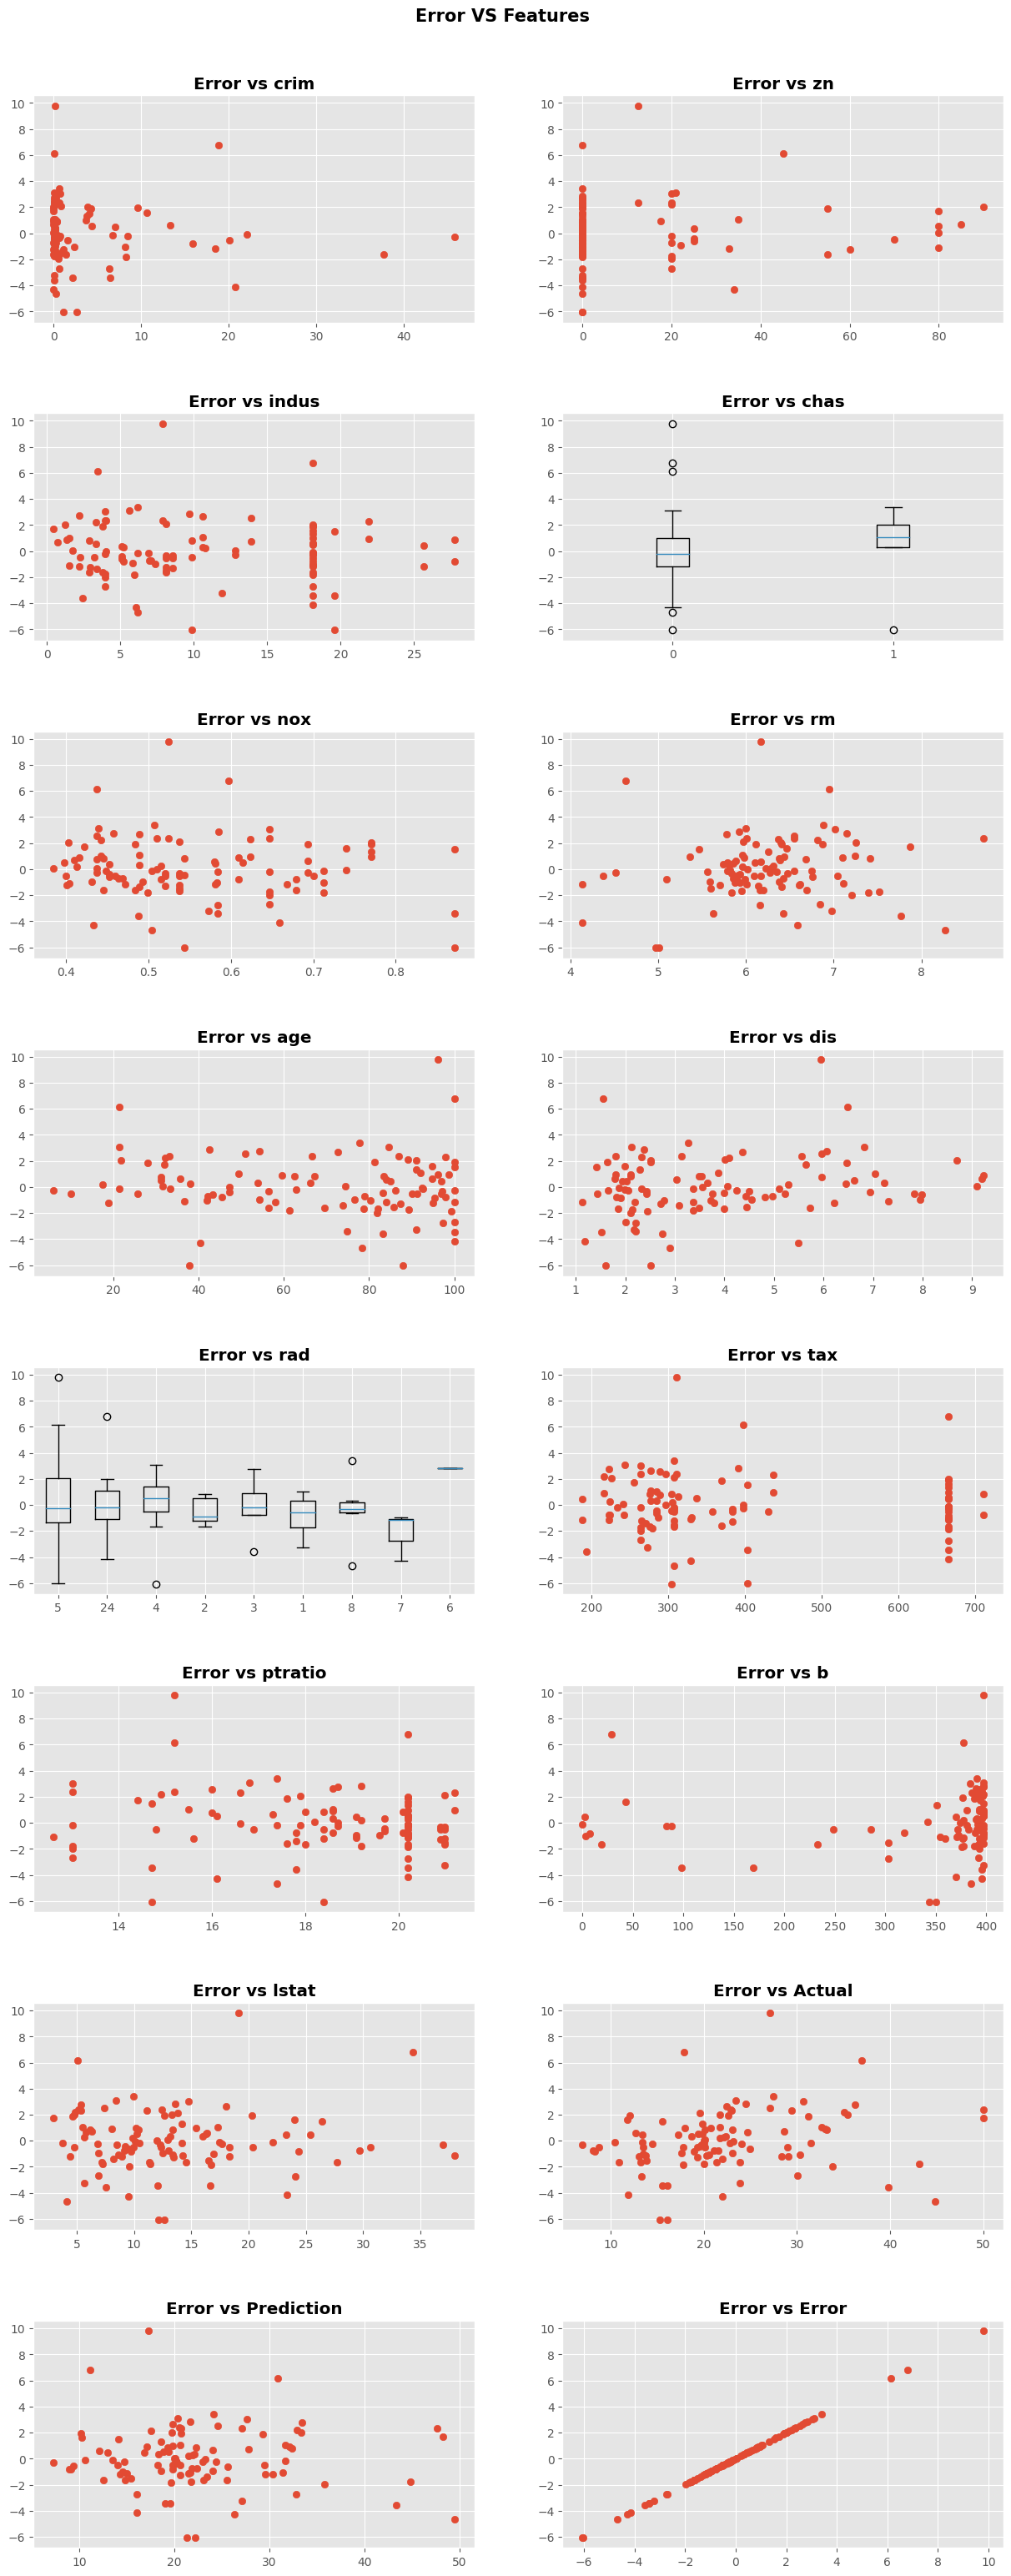

In [18]:
fig,axes=plt.subplots(8,2,figsize=(15,35))

for ax,col in zip(axes.ravel(),test.columns):
    if test[col].nunique()>=15:
        ax.scatter(x=test[col],y=test['Error'])
        ax.set_title(f'Error vs {col}',fontweight='bold')
    else:
        ax.boxplot(labels=test[col].unique(),x=[test[test[col]==label]['Error'] for label in test[col].unique()])
        ax.set_title(f'Error vs {col}',fontweight='bold')
        
plt.suptitle('Error VS Features',fontweight='bold',size=15)
plt.subplots_adjust(hspace=0.4,top=0.95)
plt.show()